In [6]:
# Import internal libraries
import glob

# Import external libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
# Analyze reliability, bandwidth, energy
data = []
datadir = "data"
for bpc in range(1, 2):
    for att in range(10, 260, 20):
        # Load and compute data
        postread = np.loadtxt(f"{datadir}/postread_{bpc}bpc_{att}.csv", delimiter=',', dtype=np.int8)
        dt = np.loadtxt(f"{datadir}/dt_{bpc}bpc_{att}.csv", delimiter=',')
        ivdd = np.loadtxt(f"{datadir}/vdd_power_{bpc}bpc_{att}.csv", delimiter=',')
        ivdd_dac = np.loadtxt(f"{datadir}/vdd_power_{bpc}bpc_{att}.csv", delimiter=',')
        ivsa = np.loadtxt(f"{datadir}/vsa_power_{bpc}bpc_{att}.csv", delimiter=',')
        ivddio = np.loadtxt(f"{datadir}/vddio_power_{bpc}bpc_{att}.csv", delimiter=',')
        ivddio_dac = np.loadtxt(f"{datadir}/vddio_power_{bpc}bpc_{att}.csv", delimiter=',')
        power_tot = ivdd * 0.9 + ivdd_dac * 0.9 + ivsa * 0.9 + ivddio_dac * 3.3 + ivddio * 3.3
        energy_tot = power_tot * dt
        bw = 2**16 * 48 * bpc / dt # bits per second
        energy_per_bit = energy_tot / 2**16 / 48 / bpc
        edp = energy_per_bit / bw

        # Load data into confmat
        confmat = np.zeros(shape=(2**bpc, 2**bpc))
        for i in range(65536):
            for j in range(48):
                if j in [19,29,38,43]:
                    continue
                confmat[j % (2**bpc)][postread[i][j]] += 1
        confmat = confmat.astype(int)
        print(confmat)

        # Symbol error magnitudes
        mae = sum(abs(i - j) * confmat[i][j] for i in range(2**bpc) for j in range(2**bpc)) / confmat.sum()
        rmse = np.sqrt(sum((i - j)**2 * confmat[i][j] for i in range(2**bpc) for j in range(2**bpc)) / confmat.sum())

        # Function to get Gray code string
        getgray = lambda x : format(2**(2**bpc) + x^x//2, f"0{2**bpc-1}b")[1:]

        # Function to get Gray code error rate for each possible symbol confusion
        grayerr = np.array([[sum([int(ic != jc) for ic, jc in zip(getgray(i), getgray(j))]) for i in range(2**bpc)] for j in range(2**bpc)]) / bpc

        # BER and CER
        ber = (grayerr * confmat).sum() / confmat.sum()
        cer = 1 - confmat.trace() / confmat.sum()
        
        # Compose dataframe
        data.append({"att": att, "bpc": bpc, "dt": dt, "power_tot": power_tot, "energy_per_bit": energy_per_bit, "edp": edp, "bw": bw, "cer": cer, "ber": ber, "mae": mae, "rmse": rmse})
data = pd.DataFrame(data)
data

[[1507315      13]
 [   3354 1372902]]
[[1507318      10]
 [   2775 1373481]]
[[1507318      10]
 [   2685 1373571]]
[[1507317      11]
 [   2581 1373675]]
[[1507321       7]
 [   2610 1373646]]
[[1507322       6]
 [   2534 1373722]]
[[1507322       6]
 [   2437 1373819]]
[[1507323       5]
 [   2570 1373686]]
[[1507323       5]
 [   2553 1373703]]
[[1507323       5]
 [   2472 1373784]]
[[1507322       6]
 [   2507 1373749]]
[[1507322       6]
 [   2519 1373737]]
[[1507325       3]
 [   2516 1373740]]


,att,bpc,dt,power_tot,energy_per_bit,edp,bw,cer,ber,mae,rmse
0,10,1,0.15922760963439941,0.056922,2.881249e-09,1.458404e-16,1.975617e+07,0.001168,0.001168,0.001168,0.034171
1,30,1,0.13952350616455078,0.056490,2.505503e-09,1.111274e-16,2.254622e+07,0.000966,0.000966,0.000966,0.031078
2,50,1,0.1379852294921875,0.056213,2.465732e-09,1.081577e-16,2.279757e+07,0.000935,0.000935,0.000935,0.030571
3,70,1,0.1365351676940918,0.056157,2.437386e-09,1.057907e-16,2.303969e+07,0.000899,0.000899,0.000899,0.029981
4,90,1,0.13602209091186523,0.056131,2.427110e-09,1.049489e-16,2.312660e+07,0.000908,0.000908,0.000908,0.030126
5,110,1,0.135819673538208,0.056273,2.429629e-09,1.049014e-16,2.316106e+07,0.000881,0.000881,0.000881,0.029679
6,130,1,0.13591837882995605,0.056153,2.426238e-09,1.048312e-16,2.314424e+07,0.000847,0.000847,0.000847,0.029107
7,150,1,0.13536548614501953,0.056504,2.431442e-09,1.046287e-16,2.323877e+07,0.000893,0.000893,0.000893,0.029883
8,170,1,0.13597774505615234,0.056343,2.435511e-09,1.052778e-16,2.313414e+07,0.000887,0.000887,0.000887,0.029784
9,190,1,0.13585734367370605,0.054900,2.371011e-09,1.023990e-16,2.315464e+07,0.000859,0.000859,0.000859,0.029309


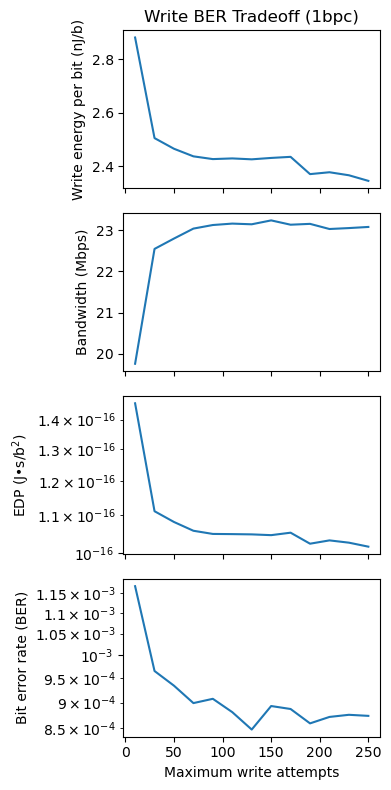

In [9]:
# Plot write BER tradeoff vs. attempts
for bpc, d in data.groupby("bpc"):
    fig, axs = plt.subplots(4, 1, figsize=(4,8), sharex=True)
    plt.xlabel("Maximum write attempts")
    axs[0].set_title(f"Write BER Tradeoff ({bpc}bpc)")
    axs[0].plot(d["att"], d["energy_per_bit"]*1e9)
    axs[0].set_ylabel("Write energy per bit (nJ/b)")
    axs[1].plot(d["att"], d["bw"]/1e6)
    # axs[1].set_yscale("log")
    axs[1].set_ylabel("Bandwidth (Mbps)")
    axs[2].plot(d["att"], d["edp"])
    axs[2].set_yscale("log")
    axs[2].set_ylabel("EDP (J•s/b$^2$)")
    axs[3].plot(d["att"], d["ber"])
    axs[3].set_yscale("log")
    axs[3].set_ylabel("Bit error rate (BER)")
    plt.tight_layout()
    plt.savefig(f"../analysis/figs/{bpc}bpc_write_ber_tradeoff.pdf")
    plt.show()

## Experiments part

In [4]:
# Analyze reliability, bandwidth, energy
edata = []
datadir = "data/"
for fname in glob.glob(f"{datadir}/dt_*config*.csv"):
    # Extract info from filename
    _, _, bpc, lvl, expt, att = fname[:-4].split('_')[-6:]
    bpc, lvl, expt, att = int(bpc[0]), int(lvl[3:]), int(expt), int(att)

    # Load and compute data
    try:
        postread = np.loadtxt(fname.replace("dt", "postread"), delimiter=',', dtype=np.int8)
        dt = np.loadtxt(fname, delimiter=',')
        ivdd = np.loadtxt(fname.replace("dt", "vdd_power"), delimiter=',')
        ivdd_dac = np.loadtxt(fname.replace("dt", "vdd_dac_power"), delimiter=',')
        ivsa = np.loadtxt(fname.replace("dt", "vsa_power"), delimiter=',')
        ivddio = np.loadtxt(fname.replace("dt", "vddio_power"), delimiter=',')
        ivddio_dac = np.loadtxt(fname.replace("dt", "vddio_dac_power"), delimiter=',')
    except OSError:
        continue
    postread_cer = (postread != lvl).mean()
    power_tot = ivdd * 0.9 + ivdd_dac * 0.9 + ivsa * 0.9 + ivddio_dac * 3.3 + ivddio * 3.3
    energy_tot = power_tot * dt
    bw = 2**16 * 48 * bpc / dt # bits per second
    energy_per_bit = energy_tot / 2**16 / 48 / bpc
    edp = energy_per_bit / bw

    # Confusion vector
    confvec = np.unique(postread, return_counts=True)
    print(confvec)

    # Compose dataframe
    edata.append({"att": att, "bpc": bpc, "lvl": lvl, "expt": expt, "dt": dt, "power_tot": power_tot, "energy_per_bit": energy_per_bit, "edp": edp, "bw": bw, "cer": postread_cer})
edata = pd.DataFrame(edata)
edata

(array([0, 1, 2, 3], dtype=int8), array([ 34929, 144972,   3794,  12913]))
(array([0, 1, 2, 3], dtype=int8), array([ 21525, 171047,   2683,   1353]))
(array([0, 1, 2, 3], dtype=int8), array([ 32091,    219, 118846,  45452]))
(array([0, 1, 2, 3], dtype=int8), array([ 44210,    322, 106896,  45180]))
(array([0, 1, 2, 3], dtype=int8), array([ 40008,    458, 103632,  52510]))
(array([0, 1, 2, 3], dtype=int8), array([ 29052,    574, 142772,  24210]))
(array([0, 1, 2, 3], dtype=int8), array([ 41805, 117420,  18488,  18895]))
(array([0, 1, 2, 3], dtype=int8), array([ 42826, 128106,  15036,  10640]))
(array([0, 1, 2, 3], dtype=int8), array([ 30687,    403, 133517,  32001]))
(array([0, 1, 2, 3], dtype=int8), array([ 34090,    522, 135794,  26202]))
(array([0, 1, 2, 3], dtype=int8), array([ 32202,   2017, 132123,  30266]))
(array([0, 1, 2, 3], dtype=int8), array([ 26024,    451, 141231,  28902]))
(array([0, 1, 2, 3], dtype=int8), array([ 25204, 150868,   6937,  13599]))
(array([0, 1, 2, 3], dtyp

,att,bpc,lvl,expt,dt,power_tot,energy_per_bit,edp,bw,cer
0,50,2,1,10,2.810500383377075,0.037228,1.663025e-08,7.429015e-15,2.238554e+06,0.262634
1,210,2,1,16,2.536163091659546,0.039034,1.573491e-08,6.342937e-15,2.480699e+06,0.130010
2,130,2,2,52,3.464393138885498,0.081863,4.507809e-08,2.482227e-14,1.816034e+06,0.395518
3,250,2,2,113,6.957268953323364,0.083203,9.200782e-08,1.017448e-13,9.042997e+05,0.456299
4,90,2,2,117,1.5341227054595947,0.086591,2.111454e-08,5.148616e-15,4.101012e+06,0.472900
...,...,...,...,...,...,...,...,...,...,...
757,10,2,1,16,0.15584754943847656,0.033503,8.299112e-10,2.055798e-17,4.036930e+07,0.365799
758,170,2,2,113,4.806242942810059,0.078250,5.977769e-08,4.566607e-14,1.309017e+06,0.462997
759,50,2,1,28,1.7512037754058838,0.060384,1.680777e-08,4.678382e-15,3.592646e+06,0.314494
760,130,2,2,25,2.3334197998046875,0.079354,2.943140e-08,1.091572e-14,2.696238e+06,0.350952


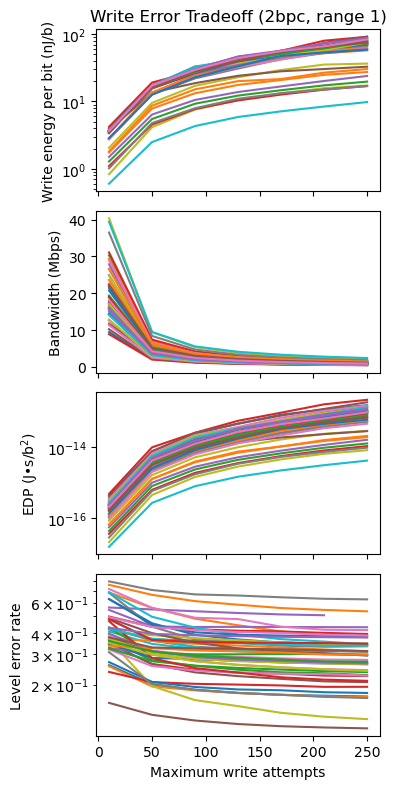

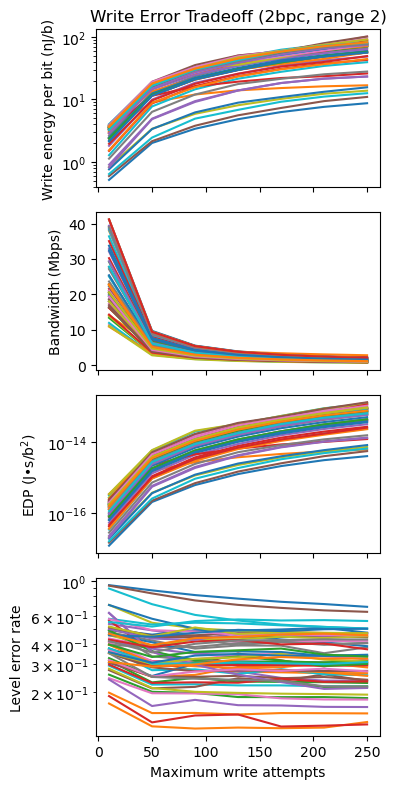

In [5]:
# Plot write BER tradeoff vs. attempts
for (bpc, lvl), d2 in edata.groupby(["bpc", "lvl"]):
    fig, axs = plt.subplots(4, 1, figsize=(4,8), sharex=True)
    plt.xlabel("Maximum write attempts")
    for expt, d in d2.sort_values("att").groupby("expt"):
        axs[0].set_title(f"Write Error Tradeoff ({bpc}bpc, range {lvl})")
        axs[0].plot(d["att"], d["energy_per_bit"]*1e9)
        axs[0].set_yscale("log")
        axs[0].set_ylabel("Write energy per bit (nJ/b)")
        axs[1].plot(d["att"], d["bw"]/1e6)
        # axs[1].set_yscale("log")
        axs[1].set_ylabel("Bandwidth (Mbps)")
        axs[2].plot(d["att"], d["edp"])
        axs[2].set_yscale("log")
        axs[2].set_ylabel("EDP (J•s/b$^2$)")
        axs[3].plot(d["att"], d["cer"])
        axs[3].set_yscale("log")
        axs[3].set_ylabel("Level error rate")
    plt.tight_layout()
    plt.savefig(f"../analysis/figs/{bpc}bpc_lvl{lvl}_opt_write_tradeoff.pdf")
    plt.show()